In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

In [7]:
with open('./data/lastofus.txt',encoding='euckr') as f:
    line =f.readlines()
    
    for i in line:
        print(i)

    _____ _   _ _____   _          ____ _____   _____ _____   _   _ ____

   |_   _| | | |  ___| | |    /?\ |  __|_   _| |     |  ___| | | | |  __|

     | | | |_| | |_    | |   /   \| |__  | |   | (?) | |_    | | | | |__

     | | |  _  |  _|   | |  ( (?) )__  | | |   | | | |  _|   | | | |__  |

     | | | | | | |___  | |__|  ?  |__| | | |   | (_) | |     | |_| |__| |

     |_| |_| |_|_____| |____|_|?|_|____| |_|   |_____|_|     |_____|____|

 Game Script by Shotgunnova (P. Summers) / Email: shotgunnova(a+)gmail(d0t)com





   01) Prologue - Hometown ............................................. GS01

   02) Summer - The Quarantine Zone .................................... GS02

   03) Summer - The Outskirts .......................................... GS03

   04) Summer - Bill's Town ............................................ GS04

   05) Summer - Pittsburgh ............................................. GS05

   06) Summer - The Suburbs ............................................ 



Joel: Just keep it running, alright?



Bill: That girl nearly got us killed.



Joel: You gotta admit -- she did hold her own back there.



Bill: You ain't gonna make it. Oh, oh, ah... Here.



[He tosses Joel a siphon.]



Joel: What's this?



Bill: You'd be amazed at how many cars still got gas in 'em.



Joel: Appreciate it. Look, Bill, um, about your buddy back there. Uh... That's

      a tough deal. And I'm, ah...



Bill: We square?



Joel: We're square.



Bill: Then get the fuck outta my town.



[They drop Bill off and hit the highway. Later on...]



Ellie: Oh, man.



Joel: Hey, what happened to sleeping?



[She holds up a comic.]



Ellie: Okay, I know it doesn't look like it, but this here is not a bad read.

       Only one problem. Right there. "To be continued!" I hate cliffhangers.



Joel: Where did you get that?



Ellie: Uhh, back at Bill's. I mean all this stuff was just lying there.



Joel: What else did you get?



Ellie: Well...



[She proffers a casse


       lower the gun.



[Ellie turns around to see James has had her in his sights the whole time.]



James: No way, David. I'm not gonna let her go.



David: Lower the gun. Now give her the medicine.



[He tosses the parcel on the floor.]



James: The others won't be happy about this.



David: Yeah, well, that's not your concern.



Ellie: Move the fuck out of the way.



David: You won't survive long out there. I can protect you.



Ellie: No thanks.



[Medicine in hand, Ellie runs back to Callus.]



Ellie: Let's get outta here. Come on.



[Eventually she returns to the lakeside resort she's been holed up in.]



Ellie: Come on. Okay...



[She goes to the room where she's been nursing a feverish Joel back to health.]



Ellie: Joel? Oh... I only managed to get a little bit of food. But...I did get

       this. Move your arm. Oh... Here we go.



[She gives him the injection, causing him to whinge.]



Ellie: Sorry. All done. That's it. You're gonna make it.



[She lays b

In [70]:
len(arr)

1000

In [12]:
import re
text = ''
with open('./data/lastofus.txt',encoding='euckr') as f:
    line =f.readlines()
    text = text.join([i for i in line if re.match(r'^[A-Z].*:',i)])  # 대문자 ^시작*:  
    
text

'Joel: Tommy, I-...Tommy. Tommy, listen to me. He\'s the contractor, okay? I\nSarah: Hey.\nJoel: Scoot.\nSarah: Fun day at work, huh?\nJoel: What are you still doing up? It\'s late.\nSarah: Oh crud. What time is it?\nJoel: It\'s way past your bedtime.\nSarah: But it\'s still today.\nJoel: Honey, please not right now. I do not have the energy for this.\nSarah: Here.\nJoel: What\'s this?\nSarah: Your birthday.\nSarah: You kept complaining about your broken watch... So I figured, you know.\nJoel: Honey, this is...\nSarah: What?\nJoel: It\'s nice, but I-...I think it\'s stuck. It\'s not...\nSarah: What? No, no, no, no.\nSarah: Oh, ha, ha.\nJoel: Where did you get the money for this?\nSarah: Drugs. I sell hardcore drugs.\nJoel: Oh, good. You can start helping out with the mortgage then.\nSarah: Stsh - yeah, you wish.\nJoel: Goodnight, baby girl.\nSarah: Hello?\nTommy: Sarah, honey, I need you to get your daddy on the phone.\nSarah: Uncle Tommy, what time is it?\nTommy: I need to talk to you

In [66]:
arr =[]
for t in text.split('\n')[:1000]:
    arr.append(t)

In [67]:
arr

["Joel: Tommy, I-...Tommy. Tommy, listen to me. He's the contractor, okay? I",
 'Sarah: Hey.',
 'Joel: Scoot.',
 'Sarah: Fun day at work, huh?',
 "Joel: What are you still doing up? It's late.",
 'Sarah: Oh crud. What time is it?',
 "Joel: It's way past your bedtime.",
 "Sarah: But it's still today.",
 'Joel: Honey, please not right now. I do not have the energy for this.',
 'Sarah: Here.',
 "Joel: What's this?",
 'Sarah: Your birthday.',
 'Sarah: You kept complaining about your broken watch... So I figured, you know.',
 'Joel: Honey, this is...',
 'Sarah: What?',
 "Joel: It's nice, but I-...I think it's stuck. It's not...",
 'Sarah: What? No, no, no, no.',
 'Sarah: Oh, ha, ha.',
 'Joel: Where did you get the money for this?',
 'Sarah: Drugs. I sell hardcore drugs.',
 'Joel: Oh, good. You can start helping out with the mortgage then.',
 'Sarah: Stsh - yeah, you wish.',
 'Joel: Goodnight, baby girl.',
 'Sarah: Hello?',
 'Tommy: Sarah, honey, I need you to get your daddy on the phone.',


In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
# tokenizer = Tokenizer(lower=False, filter= '.,?:;\'\"~!%\n')
tokenizer = Tokenizer(lower=False, filters = ".,?:;\'\`~!%\n")
tokenizer.fit_on_texts(arr)

In [22]:
tokenizer.word_index

{'Joel': 1,
 'Ellie': 2,
 'I': 3,
 's': 4,
 'you': 5,
 'the': 6,
 'it': 7,
 'to': 8,
 't': 9,
 'a': 10,
 'Tess': 11,
 'You': 12,
 'that': 13,
 'we': 14,
 're': 15,
 'this': 16,
 'of': 17,
 'on': 18,
 'Hunter': 19,
 'We': 20,
 'Oh': 21,
 'here': 22,
 'Bill': 23,
 'get': 24,
 'me': 25,
 'What': 26,
 'up': 27,
 'Tommy': 28,
 'Henry': 29,
 'Yeah': 30,
 'It': 31,
 'Alright': 32,
 'go': 33,
 'is': 34,
 'there': 35,
 'm': 36,
 'your': 37,
 'out': 38,
 'know': 39,
 'll': 40,
 'in': 41,
 'just': 42,
 'are': 43,
 'Let': 44,
 'do': 45,
 'Sam': 46,
 'what': 47,
 'That': 48,
 '2': 49,
 'be': 50,
 'don': 51,
 'can': 52,
 'they': 53,
 'for': 54,
 'got': 55,
 'and': 56,
 'Okay': 57,
 'David': 58,
 'with': 59,
 'back': 60,
 'No': 61,
 'all': 62,
 'shit': 63,
 'way': 64,
 'Hey': 65,
 'mon': 66,
 'gonna': 67,
 'not': 68,
 'was': 69,
 'Well': 70,
 'There': 71,
 'see': 72,
 'They': 73,
 'How': 74,
 'have': 75,
 'us': 76,
 'like': 77,
 'Man': 78,
 'good': 79,
 'Sarah': 80,
 'down': 81,
 'about': 82,
 'my': 

In [23]:
len(tokenizer.word_index)

2545

In [24]:
seq = tokenizer.texts_to_sequences(arr)

In [25]:
lengths = [len(line) for line in seq ]
lengths

[14,
 2,
 2,
 6,
 10,
 7,
 7,
 6,
 14,
 2,
 4,
 3,
 13,
 4,
 2,
 14,
 6,
 4,
 9,
 6,
 12,
 6,
 4,
 2,
 13,
 7,
 12,
 4,
 11,
 13,
 6,
 11,
 4,
 9,
 8,
 5,
 8,
 5,
 7,
 8,
 12,
 4,
 5,
 2,
 6,
 7,
 12,
 12,
 16,
 4,
 3,
 2,
 6,
 4,
 2,
 10,
 4,
 3,
 3,
 4,
 2,
 6,
 16,
 2,
 4,
 2,
 16,
 12,
 9,
 11,
 14,
 6,
 13,
 2,
 8,
 12,
 4,
 2,
 10,
 8,
 6,
 14,
 12,
 8,
 8,
 13,
 2,
 3,
 7,
 17,
 5,
 11,
 6,
 4,
 6,
 5,
 14,
 8,
 6,
 6,
 2,
 7,
 12,
 6,
 4,
 5,
 2,
 4,
 4,
 13,
 5,
 14,
 7,
 9,
 3,
 4,
 3,
 6,
 3,
 10,
 5,
 6,
 5,
 6,
 5,
 4,
 3,
 7,
 9,
 5,
 6,
 4,
 3,
 3,
 4,
 11,
 2,
 13,
 4,
 4,
 3,
 3,
 7,
 4,
 8,
 5,
 6,
 4,
 5,
 6,
 3,
 6,
 5,
 2,
 7,
 3,
 9,
 15,
 2,
 4,
 11,
 7,
 8,
 3,
 5,
 2,
 10,
 3,
 6,
 2,
 7,
 10,
 6,
 15,
 2,
 12,
 4,
 6,
 12,
 6,
 14,
 10,
 13,
 3,
 4,
 3,
 7,
 6,
 16,
 17,
 13,
 11,
 12,
 13,
 15,
 13,
 11,
 13,
 11,
 15,
 4,
 7,
 7,
 9,
 5,
 11,
 8,
 10,
 16,
 15,
 6,
 16,
 3,
 7,
 5,
 8,
 15,
 3,
 16,
 9,
 13,
 5,
 14,
 7,
 6,
 6,
 9,
 6,
 12,
 15,
 8,
 9,
 4,

(array([  1.,   0.,   0.,   0.,   0., 324.,   0., 289.,   0.,   0., 313.,
          0.,   0., 326.,   0., 342.,   0.,   0., 284.,   0.,   0., 231.,
          0., 201.,   0.,   0., 163.,   0., 150.,   0.,   0., 119.,   0.,
          0., 111.,   0., 156.,   0.,   0., 147.,   0.,   0., 144.,   0.,
         85.,   0.,   0.,  26.,   0.,   4.]),
 array([ 0.  ,  0.38,  0.76,  1.14,  1.52,  1.9 ,  2.28,  2.66,  3.04,
         3.42,  3.8 ,  4.18,  4.56,  4.94,  5.32,  5.7 ,  6.08,  6.46,
         6.84,  7.22,  7.6 ,  7.98,  8.36,  8.74,  9.12,  9.5 ,  9.88,
        10.26, 10.64, 11.02, 11.4 , 11.78, 12.16, 12.54, 12.92, 13.3 ,
        13.68, 14.06, 14.44, 14.82, 15.2 , 15.58, 15.96, 16.34, 16.72,
        17.1 , 17.48, 17.86, 18.24, 18.62, 19.  ]),
 <BarContainer object of 50 artists>)

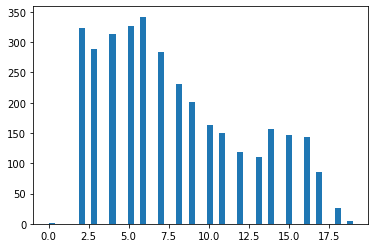

In [27]:
 plt.hist(lengths, bins=50)

In [28]:
 seq

[[1, 28, 928, 28, 28, 618, 8, 25, 92, 4, 6, 1284, 95, 3],
 [80, 65],
 [1, 1285],
 [80, 1286, 459, 102, 339, 223],
 [1, 26, 43, 5, 168, 224, 27, 31, 4, 1287],
 [80, 21, 1288, 26, 115, 34, 7],
 [1, 31, 4, 64, 460, 37, 1289],
 [80, 200, 7, 4, 168, 340],
 [1, 732, 619, 68, 90, 104, 3, 45, 68, 75, 6, 1290, 54, 16],
 [80, 121],
 [1, 26, 4, 16],
 [80, 461, 929],
 [80, 12, 733, 930, 82, 37, 620, 273, 131, 3, 734, 5, 39],
 [1, 732, 16, 34],
 [80, 26],
 [1, 31, 4, 522, 152, 928, 3, 87, 7, 4, 735, 31, 4, 68],
 [80, 26, 61, 91, 91, 91],
 [80, 21, 931, 931],
 [1, 161, 111, 5, 24, 6, 932, 54, 16],
 [80, 1291, 3, 736, 1292, 933],
 [1, 21, 79, 12, 52, 621, 934, 38, 59, 6, 1293, 171],
 [80, 1294, 935, 274, 5, 462],
 [1, 1295, 215, 182],
 [80, 523],
 [28, 80, 936, 3, 105, 5, 8, 24, 37, 1296, 18, 6, 937],
 [80, 622, 28, 47, 115, 34, 7],
 [28, 3, 105, 8, 245, 8, 37, 1297, 104, 71, 4, 1298],
 [80, 622, 28, 523],
 [80, 26, 69, 13, 62, 82, 423, 524, 12, 41, 22],
 [623, 31, 1299, 13, 47, 14, 1300, 1301, 172, 

In [38]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
seq = pad_sequences(seq, maxlen=12)
seq.shape

(3416, 12)

In [48]:
x = seq[:-1]
y = seq[1:]

In [49]:
x.shape

(3415, 12)

In [50]:
y.shape

(3415, 12)

In [51]:
x= x.reshape(3415, 12, 1)
y= y.reshape(3415, 12, 1)

In [52]:
from tensorflow.keras.utils import to_categorical

In [44]:
y_oh = to_categorical(y)
y_oh.shape

(3415, 12, 2546)

In [53]:
model = Sequential()
model.add(LSTM(128, input_shape=(12,1), return_sequences=True))
model.add(LSTM(256, return_sequences=True))
model.add(Dense(2546, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 12, 128)           66560     
                                                                 
 lstm_2 (LSTM)               (None, 12, 256)           394240    
                                                                 
 dense_1 (Dense)             (None, 12, 2546)          654322    
                                                                 
Total params: 1,115,122
Trainable params: 1,115,122
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [55]:
model.fit(x,y_oh, epochs=20, batch_size=10)

Epoch 1/20
342/342 [==============================] - 13s 8ms/step - loss: 4.7625 - accuracy: 0.3923
Epoch 2/20
342/342 [==============================] - 2s 7ms/step - loss: 4.1735 - accuracy: 0.3938
Epoch 3/20
342/342 [==============================] - 2s 7ms/step - loss: 4.1362 - accuracy: 0.3953
Epoch 4/20
342/342 [==============================] - 2s 7ms/step - loss: 4.1140 - accuracy: 0.3957
Epoch 5/20
342/342 [==============================] - 2s 7ms/step - loss: 4.0981 - accuracy: 0.3964
Epoch 6/20
342/342 [==============================] - 2s 7ms/step - loss: 4.0789 - accuracy: 0.3973
Epoch 7/20
342/342 [==============================] - 2s 7ms/step - loss: 4.0612 - accuracy: 0.3970
Epoch 8/20
342/342 [==============================] - 2s 7ms/step - loss: 4.0388 - accuracy: 0.3979
Epoch 9/20
342/342 [==============================] - 2s 7ms/step - loss: 4.0209 - accuracy: 0.3984
Epoch 10/20
342/342 [==============================] - 2s 7ms/step - loss: 3.9993 - accuracy: 0.398

In [61]:
pred = model.predict(x[7:8])
pred

array([[[7.3564047e-01, 9.3982536e-03, 6.6190627e-03, ...,
         2.9585649e-07, 3.8088908e-04, 1.0674374e-07],
        [7.1546489e-01, 1.5397307e-02, 1.8161697e-02, ...,
         7.4133797e-09, 6.0000384e-06, 7.2714168e-10],
        [6.9286078e-01, 1.5099800e-02, 7.7451626e-03, ...,
         2.8525442e-09, 7.7635423e-07, 4.8903703e-09],
        ...,
        [5.3224765e-02, 4.2435907e-02, 2.3742527e-02, ...,
         1.2348948e-08, 6.7896690e-06, 3.3425354e-06],
        [1.1702904e-02, 3.3374123e-02, 2.4727423e-02, ...,
         7.0804265e-09, 2.8288559e-06, 1.5937626e-07],
        [2.4296604e-03, 1.2556151e-02, 8.4202327e-03, ...,
         6.7931843e-08, 1.1599164e-05, 8.3927119e-08]]], dtype=float32)

In [62]:
pred.shape

(1, 12, 2546)

In [63]:
pred_tok = np.argmax(pred, axis=2) # 확률값이 가장 높은 라벨값

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 22]], dtype=int64)

In [64]:
tokenizer.word_index

{'Joel': 1,
 'Ellie': 2,
 'I': 3,
 's': 4,
 'you': 5,
 'the': 6,
 'it': 7,
 'to': 8,
 't': 9,
 'a': 10,
 'Tess': 11,
 'You': 12,
 'that': 13,
 'we': 14,
 're': 15,
 'this': 16,
 'of': 17,
 'on': 18,
 'Hunter': 19,
 'We': 20,
 'Oh': 21,
 'here': 22,
 'Bill': 23,
 'get': 24,
 'me': 25,
 'What': 26,
 'up': 27,
 'Tommy': 28,
 'Henry': 29,
 'Yeah': 30,
 'It': 31,
 'Alright': 32,
 'go': 33,
 'is': 34,
 'there': 35,
 'm': 36,
 'your': 37,
 'out': 38,
 'know': 39,
 'll': 40,
 'in': 41,
 'just': 42,
 'are': 43,
 'Let': 44,
 'do': 45,
 'Sam': 46,
 'what': 47,
 'That': 48,
 '2': 49,
 'be': 50,
 'don': 51,
 'can': 52,
 'they': 53,
 'for': 54,
 'got': 55,
 'and': 56,
 'Okay': 57,
 'David': 58,
 'with': 59,
 'back': 60,
 'No': 61,
 'all': 62,
 'shit': 63,
 'way': 64,
 'Hey': 65,
 'mon': 66,
 'gonna': 67,
 'not': 68,
 'was': 69,
 'Well': 70,
 'There': 71,
 'see': 72,
 'They': 73,
 'How': 74,
 'have': 75,
 'us': 76,
 'like': 77,
 'Man': 78,
 'good': 79,
 'Sarah': 80,
 'down': 81,
 'about': 82,
 'my': 

In [65]:
idx_word = {}

for w in tokenizer.word_index:
    idx_word[tokenizer.word_index[w]] = w
    
idx_word

{1: 'Joel',
 2: 'Ellie',
 3: 'I',
 4: 's',
 5: 'you',
 6: 'the',
 7: 'it',
 8: 'to',
 9: 't',
 10: 'a',
 11: 'Tess',
 12: 'You',
 13: 'that',
 14: 'we',
 15: 're',
 16: 'this',
 17: 'of',
 18: 'on',
 19: 'Hunter',
 20: 'We',
 21: 'Oh',
 22: 'here',
 23: 'Bill',
 24: 'get',
 25: 'me',
 26: 'What',
 27: 'up',
 28: 'Tommy',
 29: 'Henry',
 30: 'Yeah',
 31: 'It',
 32: 'Alright',
 33: 'go',
 34: 'is',
 35: 'there',
 36: 'm',
 37: 'your',
 38: 'out',
 39: 'know',
 40: 'll',
 41: 'in',
 42: 'just',
 43: 'are',
 44: 'Let',
 45: 'do',
 46: 'Sam',
 47: 'what',
 48: 'That',
 49: '2',
 50: 'be',
 51: 'don',
 52: 'can',
 53: 'they',
 54: 'for',
 55: 'got',
 56: 'and',
 57: 'Okay',
 58: 'David',
 59: 'with',
 60: 'back',
 61: 'No',
 62: 'all',
 63: 'shit',
 64: 'way',
 65: 'Hey',
 66: 'mon',
 67: 'gonna',
 68: 'not',
 69: 'was',
 70: 'Well',
 71: 'There',
 72: 'see',
 73: 'They',
 74: 'How',
 75: 'have',
 76: 'us',
 77: 'like',
 78: 'Man',
 79: 'good',
 80: 'Sarah',
 81: 'down',
 82: 'about',
 83: 'm

In [ ]:
temp = ''

for l in pred:
    for w in l:
        if w in